# TP 3 - Approximation des moindres carres

Afin d’exploiter des données expérimentales, nous cherchons une approximation d’une fonction f
dont seules les valeurs ”approximatives” $y_i \simeq f(x_i )$ en certains points $x_i$ sont connues. (Ces données
sont construites ici via une fonction bruitée.)

In [217]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import sys
import operator

On introduit f et sa valeur en des noeuds à approcher:

In [218]:
def f(x):

    v1 =  2.  + 0.01 * rd.random()
    v2 =  3.  + 0.02 * rd.random()
    s1 =  4.  + 0.01 * rd.random()
    s2 =  6.  + 0.1  * rd.random()
    n1 =  0.5 + 0.05 * rd.random()
    n2 = -0.5 + 0.05 * rd.random()
    return v1*math.exp(-s1*(x-n1)**2) + v2*math.exp(-s2*(x-n2)**2)


In [292]:
def data(n,x_min,x_max):

    noeuds = np.zeros(n)
    val    = np.zeros(n)
    for i in range(0,n):
        noeuds[i] = x_min + rd.random() * (x_max-x_min) 
        val[i]    = f(noeuds[i])*(1 + 0.4*rd.random())
    noeuds[0]     = x_min
    noeuds[n-1]   = x_max
    val[0]    = f(noeuds[0])*(1 + 0.4*rd.random())
    val[n-1]    = f(noeuds[n-1])*(1 + 0.4*rd.random())
    return [noeuds, val]

### Question 1:

Modifiez la fonction ci-dessous pour construire la matrice de Vandermonde de degré n associée à un vecteur de noeuds $(x_i)_{i=0,...,m}$


In [293]:
def Vandermonde_Matrix_construction(n,noeuds):
    V = np.zeros((len(noeuds),n+1))
    for i in range(0,n+1):
        for j in range(0,len(noeuds)):
            V[j,i] = noeuds[j]
    return V

### Question 2:

Complétez la fonction `Matrix_tVV` afin de construire la matrice de l'équation normale pour le problème des moindres carrés discrets associée
aux noeuds $(x_i)_{i=0,...,m}$ et pour un polynôme de degré n.

In [294]:
def Matrix_tVV(n,noeuds):
    V = Vandermonde_Matrix_construction(n,noeuds)
    M= np.zeros((V.shape[1],V.shape[1]))
    return M

### Question 3:

Modifiez la fonction `Vecteur_tVY` pour construire le vecteur de l'équation normale pour le problème des moindres carrés discrets associée
aux noeuds $(x_i)_{i=0,...,m}$ et aux valeurs $(y_i)_{i=0,...,m}$ pour un polynôme de degré n.
Indication: On pourra utiliser la fonction `np.matmul()` pour le produit de matrices.


In [295]:
def Vecteur_tVY(n,noeuds,f_noeuds):
    V = Vandermonde_Matrix_construction(n,noeuds)
    M=np.zeros((V.shape[1]))
    return M

### Question 4:

Complétez la fonction `Polynome_MC` qui renvoie la valeur au point $x$ du polynôme des moindres carrés discret de degrés N associé aux noeuds $(x_i)_{i=0,...,m}$ et aux valeurs $(y_i)_{i=0,...,m}$.

In [296]:
def coeff_polynomiaux_MC(n,noeuds,f_noeuds):
    M = Matrix_tVV(n,noeuds)
    V = Vecteur_tVY(n,noeuds,f_noeuds)
    return V
    #return np.linalg.solve(M,V)

In [297]:
def polynome_MC(x,coeff):
    val=0
    for i in range(0,len(coeff)):
        val=coeff[i]
    return val

### Question 5:

Tracer ce polynôme sur $[-1,1]$ et comparer avec les points $(y_i)$ pour $m=50$ points et $n=10$.

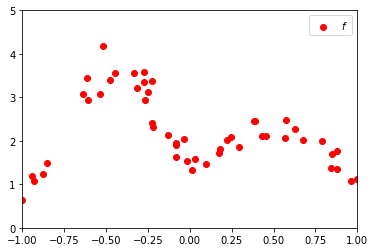

In [298]:
"""
domaine de definition et nombre de points
"""
x_min    = -1.
x_max    =  1.

N_points = 50

N_grid   = 1000
grid     = [x_min + (i*1.)*(x_max-x_min)/(N_grid*1.) for i in range(0,N_grid+1)]

"""
noeuds x_i et valeurs f(x_i)
"""
[noeuds,f_noeuds] = data(N_points,x_min,x_max)


"""
construction du polynome d'approximation des moindres carres discrets
"""
degre     = 10
f_MCD     = np.zeros(N_grid+1)
coeff=coeff_polynomiaux_MC(degre,noeuds,f_noeuds)
f_MCD = [polynome_MC(x,coeff) for x in grid]

fig = plt.figure(1)
plt.axis([-1., 1., 0., 5.])
plt.scatter(noeuds, f_noeuds  , color='red'  , label='$f$')
#plt.plot(   grid,   f_MCD,      color='black', label='$f_{MCD}$')
plt.legend()
plt.show()


### Question 6:

Construire (ou récupérer du TP1) le polynôme d'interpolation de Lagrange aux points $(x_i)_{i=0,...,m}$. 

In [299]:
def Lagrange_pol(i,x,noeuds):
    """
    i-eme polynome (de base) de Lagrange pour les noeuds choisis
    """
    val = 1.
    for j in range(len(noeuds)):
        if not j == i:
           val = 1
    return val

In [300]:
def Lagrange_app(x,noeuds,f_noeuds):
    """
    approximation de Lagrange de degree i aux noeud choisis, au point x
    """
    val = 0.
    for i in range(0,len(noeuds)):
        val += f_noeuds[i] 
    return val

### Question 7

Construire une fonction permettant de réordonner les points $(x_i)_{i=0,...,m}$ dans l'ordre croissant et ordonner le vecteur $(y_i)_{i=0,...,m}$ en conséquence.

In [301]:
def reordonne_noeuds(noeuds,f_noeuds):
    noeuds_ordonnes=np.zeros(len(noeuds))
    f_noeuds_ordonnes=np.zeros(len(f_noeuds))
    l=[]
    for i in range(0,len(noeuds)):
        l=l+[[noeuds[i],f_noeuds[i]]] #on concatène les noeuds et f_noeuds
    l=sorted(l, key=operator.itemgetter(0)) #permet de trier une liste en fonction du premier argument
    for i in range(0,len(noeuds)):
        noeuds_ordonnes[i]=noeuds[i] #on recupère le premier élément de chaque paire
        f_noeuds_ordonnes[i]=f_noeuds[i] #et ici le dernier élément
    return [noeuds_ordonnes,f_noeuds_ordonnes]

### Question 8:

Construire (ou récupérer) l'interpolation de Lagrange (de degrés 1) par morceaux aux points $(x_i)_{i=0,...,m}$. 


In [302]:
def identif_sousint(x,noeuds):
    """
    identification du sousintervalle
    """
    if(x<noeuds[0] or x>noeuds[len(noeuds)-1]):
        print('x=', x, 'est hors de l intervalle', [noeuds[0],noeuds[len(noeuds)-1]])
        #quit()
        sys.exit(0)
    j=0
    for i in range(0,len(noeuds)-1):
        if x>noeuds[i+1]:
            j=0

    return j 

In [303]:
def Lagrange_app_mor(x,s0,s1,f0,f1):
    """
    approximation de Lagrange de degree 1 aux noeuds s0 et s1, au point x 
    """
    l_0 = 0
    l_1 = 0
    val = 0  
    return val

In [304]:
def Lagrange_morceaux(x,noeuds,f_noeuds):
    """
    approximation de Lagrange par morceaux de degree 1 au point x
    """
    k   = identif_sousint(x,noeuds)
    Lpm = Lagrange_app_mor(x,noeuds[k],noeuds[k+1],f_noeuds[k],f_noeuds[k+1])
    return Lpm

On compare ensuite les différentes interpolations de f pour m=20 et n=10 (par les moindres carres discrets, l'interpolation de Lagrange et celle par morceaux). Réduire la valeure de m. Qu'observe-t-on?

In [305]:
"""
domaine de definition et nombre de points
"""
x_min    = -1.
x_max    =  1.

N_points = 20

N_grid   = 1000
grid = [x_min + (i*1.)*(x_max-x_min)/(N_grid*1.) for i in range(0,N_grid+1)]

"""
noeuds x_i et valeurs f(x_i)
"""
[noeuds,f_noeuds] = data(N_points,x_min,x_max)


In [306]:
"""
construction du polynome d'approximation des moindres carres discrets
"""
degre     = 10
coeff_pol = coeff_polynomiaux_MC(degre,noeuds,f_noeuds)
f_MCD     = [polynome_MC(grid[i],coeff_pol) for i in range(0,N_grid+1)]


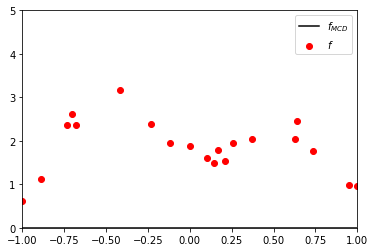

In [307]:
"""
figure : f et son approximation
"""

fig = plt.figure(1)
plt.axis([-1., 1., 0., 5.])
plt.scatter(noeuds, f_noeuds  , color='red'  , label='$f$'  )
plt.plot(grid, f_MCD, color='black'  , label='$f_{MCD}$'  )
plt.legend()
#fig.savefig('f.png')
plt.show()

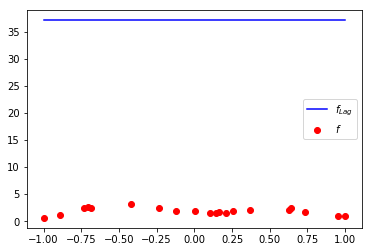

In [308]:
"""
interpolation de Lagrange
"""
[noeuds,f_noeuds] = reordonne_noeuds(noeuds,f_noeuds)

f_Lag = [Lagrange_app(grid[i],noeuds,f_noeuds) for i in range(0,N_grid+1)]
fig=plt.figure(1)
#plt.axis([-1., 1., 0., 5.])
plt.scatter(noeuds, f_noeuds  , color='red'  , label='$f$'  )
plt.plot(grid, f_Lag, color='blue'  , label='$f_{Lag}$'  )
plt.legend()
plt.show()
#fig.savefig('f_Lag.png')


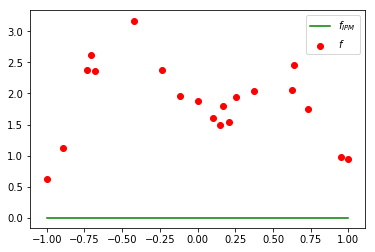

In [309]:
"""
interpolation de Lagrange par morceaux
"""
f_IPM = [Lagrange_morceaux(grid[i],noeuds,f_noeuds) for i in range(0,N_grid+1)]
plt.scatter(noeuds, f_noeuds  , color='red'  , label='$f$'  )
plt.plot(grid, f_IPM, color='green'  , label='$f_{IPM}$'  )
plt.legend()
#fig.savefig('f_IPM.png')
plt.show()